# Best Fit Line

today we are going to write our own code for fitting a line and then compare it to differnt functions in python.  We are going to take our math form Daniel C. Harris, Quantitative Chemical Analysis pages 66 and 67.  Python can fit a line for you.  But it is good to do a few of these functions by hand to see how they work.  

To begin we are going to cheat and make our lives easier and use the numpy package.  This package lets us do some array operations really easily and we won't have to do for loops.  I was thinking of being mean and using all for loops.  But lets take advantage of python.  First lets import numpy and see what we can do.  

In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [33]:
x=np.array([1.,3,4,6])
print (x)
type(x)

[1. 3. 4. 6.]


numpy.ndarray

So we could enter a list but instead of calling it a list we call it a numpy array.  This is like a supercharged list.  

Now we can make the y

In [34]:
y=np.array([2,3,4,5])

Now this is where numpy gets really cool.  you can multiply and add your lists.  This is different than array math if you have taken linear algebra.  But we will be able to do that also.  

In [6]:
print (x*y)

[ 2.  9. 16. 30.]


do you see what it just did?  It multiplied elementwise!

In [7]:
print (x+y)

[ 3.  6.  8. 11.]


In [8]:
print (x-y)

[-1.  0.  0.  1.]


In [9]:
print (x/y)

[0.5 1.  1.  1.2]


In [10]:
print (x%y)

[1. 0. 0. 1.]


If you are doing linear algebra there are methods to do true matrix multiplication.   For example the dot product. 

In [11]:
print (np.dot(x,y))

57.0


In [12]:
print (np.sum(x))

14.0


In [13]:
print (len(x))

4


remember that tab is your friend. if you type np. and hit tab you will see a ton of functions we can call

In [ ]:
np.

### What does our data look like?

Text(0, 0.5, 'y')

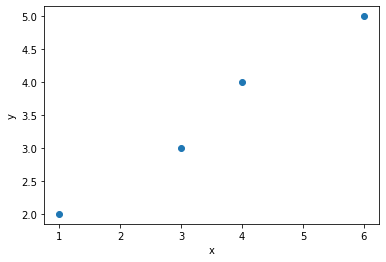

In [5]:
fig,ax=plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')

It is not a perfect line.  So we need to fit a best fit line!

### Now we can fit a line!!!!

I have now given you all the tools you need to figure out the best fit equation of a line.  Remember the best fit equation of the line is y=mx+b where m is the slope and b is the intercept. We fit 2 points last time which define a line.  When you have many points you have to find the best fit.  We can do that!  To do the fit when you have multiple points you get the equations 

# $m=\frac{(n\Sigma x_i y_i - \Sigma x_i \Sigma y_i)}{(n\Sigma (x_i^2)  - (\Sigma x_i)^2)}  $

# $b=\frac{\Sigma(x_i^2) \Sigma y_i - (\Sigma x_i y_i)\Sigma x_i}{n\Sigma (x_i^2) - (\Sigma x_i)^2}$

remember $x_i$ means for each element in the list of x. 

so in our case $x_0 = 1, x_1=3, x_2=4,x_3=6$ 

if we sum up all of one list that is $\Sigma x_i=1+3+4+6=14$  

n is the length of our list

Remembr PEMDAS!

So lets plot our x and y data, look at it and then fit it.  

So go ahead and figure out your m and b and then plot the line on the graph.  

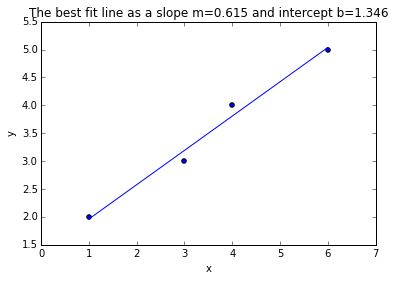

### Now lets use Python to fit the line. 
### Two functions
### 1.  linregress
### 2.  Polyfit (not critical for now)

### Linregress (short for linear regression)

I like linregress from scipy for my basic line fitting.  the strength it has over polyfit is that it returns a p-value and an r which you can convert into r$^2$ along with the slope and intercept.  Lets learn about it!

In [12]:
?stats.linregress

The key is we give it an x and y and then it returns:
-------
slope : float
    slope of the regression line
    
intercept : float
    intercept of the regression line

r-value : float
    correlation coefficient

p-value : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero.

stderr : float
    Standard error of the estimate

We have talked about this some. But I want to say more explicitly here. In python when you call a function it can return many things. It doesn't have to return one number. It can return an array or multiple values.  For linregress it returns 5 values.  We can names these or put them in an array (I use array and list semi-interchangeably, I apologize and I will try to fix this). **HOW PYTHON CAN RETURN MANY THINGS ON THE LEFT SIDE OF AN EQUAL SIGN IS WEIRD**. Get used to it!

In [7]:
stats.linregress(x,y)

LinregressResult(slope=0.6153846153846154, intercept=1.3461538461538458, rvalue=0.9922778767136677, pvalue=0.007722123286332257, stderr=0.05439282932204183)

Why do I like stats.linregress?  Becuase it gives us the r-value (square it and you have the r-squared) and the p-value.   How do these results compare against yours that you calculated?

But if you want to use your stats results set it equal to something, it will make a list and then you can access it.  Or you can set each item.  so the two ways are.

### First way. Set results equal to a list

In [8]:
stats_out=stats.linregress(x,y)

In [9]:
stats_out[0]

0.6153846153846154

In [10]:
stats_out

LinregressResult(slope=0.6153846153846154, intercept=1.3461538461538458, rvalue=0.9922778767136677, pvalue=0.007722123286332257, stderr=0.05439282932204183)

I just learned a cool trick that I like.  You can also use dot notation with your linregress output!  This is nice!

But now you can use the names to get the results.

In [44]:
print (stats_out.slope)

0.6153846153846154


In [45]:
print (stats_out.intercept)

1.3461538461538458


### We can give the output meaningful names!

In [38]:
slope, intercept, r_value,p_value,stderr= stats.linregress(x,y)

In [39]:
slope

0.6153846153846154

In [40]:
intercept

1.3461538461538458

We can give the output nonsensical names.  Remember we control the computer and we are naming them!

In [41]:
phineas, ferb, perry,candace,isabelle= stats.linregress(x,y)

In [42]:
print (ferb)

1.3461538461538458


so it is up to you on how you want to get to the data from a function like stats.linregress()

One thing I have problems with is long lines I want on multiple lines.  For example sometimes I like to define a long string and then use that string as a title.  To have it go over multiple lines you can use brackets.  here is an example of a long string I made for a title.   You can see me accessing the results both ways.  Plus I added a \n to break lines and python let me break up the code on multiple lines since I was in a parantheses.  Sometimes you can also add a \ to break the lines to get a line continuation.  see https://stackoverflow.com/questions/4172448/is-it-possible-to-break-a-long-line-to-multiple-lines-in-python

In [46]:
title=('The best fit line as a slope m={:.3f} and intercept b={:.3f}'\
       .format(stats_out[0],stats_out[1])+
       '\nbest fit line linregress slope m={:.3f} and intercept b={:.3f} '\
       .format(slope,intercept))
print (title)


The best fit line as a slope m=0.615 and intercept b=1.346
best fit line linregress slope m=0.615 and intercept b=1.346 


### Now lets fix up our graph!
We can put the title back on.


Text(0.5, 1.0, 'The best fit line as a slope m=0.615 and intercept b=1.346\nbest fit line linregress slope m=0.615 and intercept b=1.346 ')

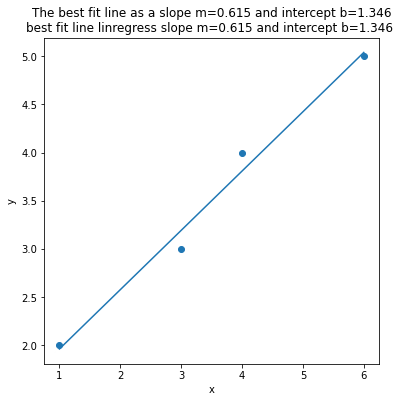

In [47]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)  # I made a square graph
ax.scatter(x,y)

#find the stats

#plot the best fit line
x_fit=np.linspace(np.min(x),np.max(x))
ax.plot(x_fit,x_fit*stats_out[0]+stats_out[1])

ax.set_xlabel('x')
ax.set_ylabel('y')
title=('The best fit line as a slope m={:.3f} and intercept b={:.3f}'\
       .format(stats_out[0],stats_out[1])+
       '\nbest fit line linregress slope m={:.3f} and intercept b={:.3f} '\
       .format(slope,intercept))
ax.set_title(title)

#### But I think adding a textbox to the graph makes it look more professional

Sometimes when making a graph, instead of putting in a title it looks better to put in a text box with just the details.  It is a three step process to make a nice box. Scroll down this link and you can see where I got the recipe from. http://matplotlib.org/users/recipes.html  It is at the bottom where it says Placing Text Boxes

1.  First you define the box by making a dictionary of the box properties.  We ususally call it props for the properties of the box.

2.  Then you make the text string you want in the box.  for a linear equation you usually want slope, interecept, r$^2$, and p-value

3.  You then say where you want the information.  This is within the ax properties since we will put it into the graph.  You tell it the relative location, Then you give it the text, somemore information, and then the props

4.  Also add the linregress to this cell to do everything in one place to make it clean

Text(0.05, 0.95, 'm=0.615\nb=1.346\n$r^2$=0.985\np=0.008')

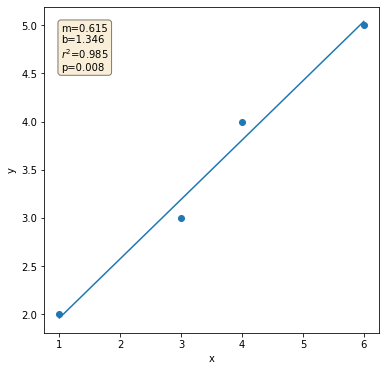

In [49]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)  # I made a square graph
ax.scatter(x,y)

#Stats on the data
slope, intercept, r_value,p_value,stderr= stats.linregress(x,y)

#plot the best fit line
x_fit=np.linspace(np.min(x),np.max(x))
ax.plot(x_fit,x_fit*stats_out[0]+stats_out[1])

ax.set_xlabel('x')
ax.set_ylabel('y')

# This is the code I added to get the box below with the normal graphing
props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)

textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'\
        .format(slope,intercept,r_value**2, p_value)
ax.text(0.05,0.95,textstr,transform=ax.transAxes\
        ,fontsize=10,verticalalignment='top',bbox=props)

## Class Assignment
### Fit a line to the KNYC and KLGA data and plot it
Now can you go back and get the KNYC and KLGA weather data and see if they are correlated?  I would use your program and then compare to linregress.  Remember to use np.array([]) to enter the data as a numpy array.  Also remember you need at least one float in your list to make it all floats.  I like the second graph with the box!

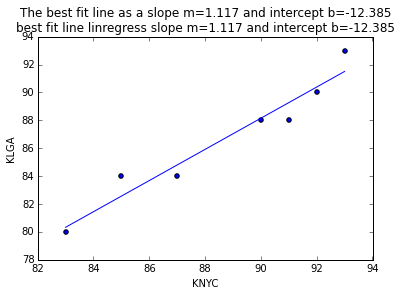

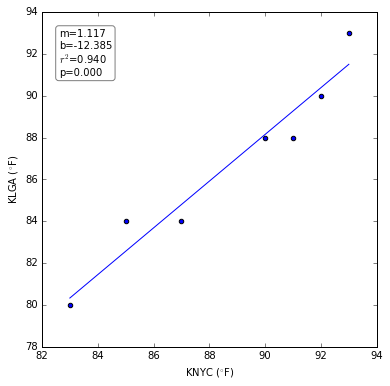

## This is Bonus material to help you understand p-values.  If you have time left after linregress keep going with this.   But not on HW.

## What is a p-value?
Statisticians argue about p-values and what they exactly mean.  We are going to do an exercise to help you understand.

In my simplistic world I think of a p-value as the chance of the result happening by chance.

a p-value of 0.05 means that result could happen by chance 5% of the time.  It sort of but not quite means that the result is real 95% of the time.  

a p-value of 0.01 means that result could happen by chance 1% of the time.  It sort of but not quite means that the result is real 99% of the time.   

you usually see people writing p<0.05 when they want to show the relationship is siginificant.  We say it is significant because only 5% of the time it happens randomly.

This means if we randomly create data.  5% of the time we would get a p-value<0.05.  95% of the time our results would look like junk.  so lets do it!

Use the nump function random to get random numbers from 0 to 1.  it is np.random.random(size) and you give how many. lets do 50.  

In [23]:
np.random.random(50)

array([0.25275895, 0.03305665, 0.94104781, 0.6722305 , 0.23773632,
       0.93851915, 0.12961236, 0.10201882, 0.48071812, 0.49040787,
       0.75001889, 0.92054346, 0.93788928, 0.70639629, 0.02906303,
       0.70715162, 0.55801932, 0.75910762, 0.19028569, 0.03269578,
       0.13596112, 0.72398551, 0.65856306, 0.24053408, 0.81387377,
       0.60808716, 0.73752055, 0.79190437, 0.00365806, 0.93270819,
       0.12394915, 0.81827269, 0.61999088, 0.32774057, 0.87897003,
       0.12372507, 0.91374782, 0.93088581, 0.87484   , 0.4256022 ,
       0.27847397, 0.15926549, 0.26533697, 0.89631707, 0.98672037,
       0.69397302, 0.13111585, 0.33728261, 0.02734482, 0.05421295])

Now make your x and y data each with 50 numbers

In [24]:
x=np.random.random(50)
y=np.random.random(50)

Now plot the data.  Every time you run it your data will change.  Run it a few times and see if the points move around!

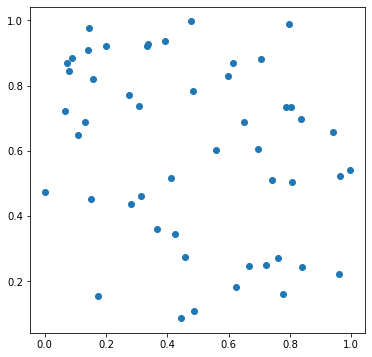

In [26]:
x=np.random.random(50)
y=np.random.random(50)

fig,ax=plt.subplots()
fig.set_size_inches(6,6)  # I made a square graph
ax.scatter(x,y)

slope, intercept, r_value,p_value,stderr= stats.linregress(x,y)

Now add the best fit line

Text(0.05, 0.95, 'm=0.173\nb=0.465\n$r^2$=0.029\np=0.234')

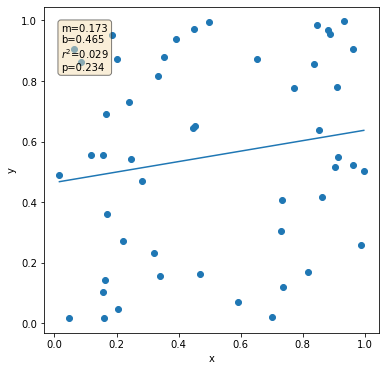

In [52]:
x=np.random.random(50)
y=np.random.random(50)

fig,ax=plt.subplots()
fig.set_size_inches(6,6)  # I made a square graph
ax.scatter(x,y)

#calculate the best fit line
slope, intercept, r_value,p_value,stderr= stats.linregress(x,y)

#plot the best fit line
x_fit=np.linspace(np.min(x),np.max(x))
ax.plot(x_fit,x_fit*slope+intercept)

ax.set_xlabel('x')
ax.set_ylabel('y')

# This is the code I added to get the box below with the normal graphing
props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'\
        .format(slope,intercept,r_value**2,p_value)
ax.text(0.05,0.95,textstr,transform=ax.transAxes\
        ,fontsize=10,verticalalignment='top',bbox=props)

Now rerun the cell and count how many times it takes you to get a p-value less than 0.05.  Then share with your breakout rooms  It took me 27.

Now lets make the computer work for us.  Think about this.  We can ask the computer to make the graph above 1000 times.  Then we can ask how many times we got a p-value less than 0.05.  If it is random our answer should come about near but probably not exactly 50.  

Now lets get rid of the graph and run the regression 1000 times and count how many times we get a significant result

In [2]:
num_sig=0

for i in np.arange(1000):
    x=np.random.random(50)
    y=np.random.random(50)

    #calculate the best fit line
    slope, intercept, r_value,p_value,stderr= stats.linregress(x,y)
    if p_value<0.05:
        num_sig+=1
        print('Loop Number {} with a p_value of {}'.format(i,p_value))

print('I ran the for loop 1000 times and the \
p_value was less than 0.05 {} times'.format(num_sig))


Loop Number 5 with a p_value of 0.0020893363063933723
Loop Number 34 with a p_value of 0.032328839063339276
Loop Number 37 with a p_value of 0.031918990019030875
Loop Number 44 with a p_value of 0.04149883722011727
Loop Number 88 with a p_value of 0.029077609957245145
Loop Number 113 with a p_value of 0.028280925002720416
Loop Number 148 with a p_value of 0.026359848790453482
Loop Number 161 with a p_value of 0.04761320046461643
Loop Number 200 with a p_value of 0.02092429442588252
Loop Number 232 with a p_value of 0.003942787475875814
Loop Number 245 with a p_value of 0.017140372725697416
Loop Number 278 with a p_value of 0.03806704023406989
Loop Number 288 with a p_value of 0.03387504955197635
Loop Number 305 with a p_value of 0.01773746174587094
Loop Number 315 with a p_value of 0.045512391783480904
Loop Number 326 with a p_value of 0.0008239029473422647
Loop Number 340 with a p_value of 0.02422983146755901
Loop Number 366 with a p_value of 0.012904399570162494
Loop Number 380 with 

So hopefully this helps you with a p-values.  the p-value tells you how often the result may happen randomly.  So the lower the p-value the lower the probability of the result happening randomly.  Therefore you can "trust" the result more.  But really you report the p-value so people know how you are making your choice on the significance of the results.  A lot of methods report a p-value so you will be seeing this!